# Decision Tree

Soluções Não Lineares

Valores **discretos (mais de 2)**...[0,1,2,3...] ... dias da semana [sat,sun,mon,fri]...

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
df = sns.load_dataset('tips')

"""df.drop(
    ['smoker','time','size'],
    axis=1,
    inplace=True
)""";

"df.drop(\n    ['smoker','time','size'],\n    axis=1,\n    inplace=True\n)"

In [141]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [142]:
# Transforme String in Numbers
df = pd.get_dummies(
    df,
    #somente irei deixar "day" sem número
    columns=['sex','smoker','time'],    
)

df.head()

,total_bill,tip,day,size,sex_Male,sex_Female,smoker_Yes,smoker_No,time_Lunch,time_Dinner
0,16.99,1.01,Sun,2,0,1,0,1,0,1
1,10.34,1.66,Sun,3,1,0,0,1,0,1
2,21.01,3.50,Sun,3,1,0,0,1,0,1
3,23.68,3.31,Sun,2,1,0,0,1,0,1
4,24.59,3.61,Sun,4,0,1,0,1,0,1


In [178]:
from sklearn.model_selection import train_test_split

In [179]:
x = df.drop('day',axis=1)
y = df['day']

In [180]:
x_train,x_test,y_train,y_test = train_test_split(
    x,
    y,
    test_size = 0.2
)

In [195]:
from sklearn.tree import DecisionTreeClassifier

In [208]:
dtree = DecisionTreeClassifier(
    max_depth=6,
    #Quanto mais você força o valor em
    #max_depth, maior o SCORE no TRAIN
    #e menor no TESTE... Isso não nos serve
    #de nada ter um modelo 1 em TRAIN
    #e fraco na previsão do TESTE
    # ou seja, existe um valor BOM
)

In [209]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [210]:
dtree.score(x_train,y_train)

0.8461538461538461

In [211]:
dtree.score(x_test,y_test)

0.7142857142857143

In [241]:
# Vamos simular uma pessoa e ver que dia
# ela estaria no restaurante

"""
total_bill
tip
day ->(Previsão)
size
sex_Male
sex_Female
smoker_Yes
smoker_No
time_Lunch
time_Dinner
"""
inventei = [40,20,4,1,0,1,0,1,0]
inventei = np.array(inventei)
inventei = inventei.reshape(1,-1)
inventei

array([[40, 20,  4,  1,  0,  1,  0,  1,  0]])

In [242]:
x_train.shape, inventei.shape
# OKAY 

((195, 9), (1, 9))

In [245]:
dtree.predict(inventei)
# Essa pessoa foi no restaurante TERÇA

array(['Thur'], dtype=object)

### Métricas para Analisar

In [212]:
predictions = dtree.predict(x_test)

In [246]:
predictions[0:4]

array(['Thur', 'Sat', 'Thur', 'Sat'], dtype=object)

In [247]:
from sklearn.metrics import classification_report

In [248]:
from sklearn.metrics import confusion_matrix

In [249]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 2  3  1  0]
 [ 0  9  6  0]
 [ 0  4 10  0]
 [ 0  0  0 14]]


              precision    recall  f1-score   support

         Fri       1.00      0.33      0.50         6
         Sat       0.56      0.60      0.58        15
         Sun       0.59      0.71      0.65        14
        Thur       1.00      1.00      1.00        14

    accuracy                           0.71        49
   macro avg       0.79      0.66      0.68        49
weighted avg       0.75      0.71      0.71        49



# Random Forest Classifier 

In [310]:
from sklearn.ensemble import RandomForestClassifier

In [331]:
rfc = RandomForestClassifier(
    n_estimators=13
)

In [332]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=13,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [333]:
rfc.score(x_train,y_train)

0.9794871794871794

In [334]:
rfc.score(x_test,y_test)

0.6530612244897959

### Visualizando Matriz confusão pelo Heatmap

In [335]:
rfc_pred = rfc.predict(x_test)

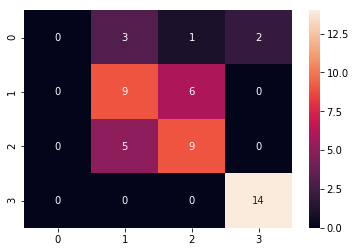

In [336]:
sns.heatmap(confusion_matrix(y_test,rfc_pred)
           ,annot=True)

In [337]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[ 0  3  1  2]
 [ 0  9  6  0]
 [ 0  5  9  0]
 [ 0  0  0 14]]


              precision    recall  f1-score   support

         Fri       0.00      0.00      0.00         6
         Sat       0.53      0.60      0.56        15
         Sun       0.56      0.64      0.60        14
        Thur       0.88      1.00      0.93        14

    accuracy                           0.65        49
   macro avg       0.49      0.56      0.52        49
weighted avg       0.57      0.65      0.61        49



/home/miguel/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
